In [ ]:
import pandas as pd
import sqlalchemy as sa
pd.set_option('display.max_rows', 1000)

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
 # uploaded = files.upload()

Saving Unicornlogo3_colab.png to Unicornlogo3_colab.png


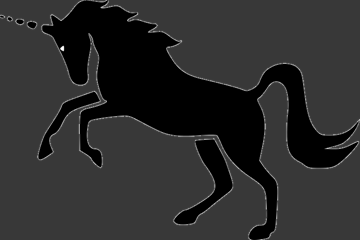

In [ ]:
# Image('Unicornlogo3_colab.png')

In [ ]:
unicorn_company_url = 

In [ ]:
engine = sa.create_engine(unicorn_company_url)
connection = engine.connect().execution_options(isolation_level="AUTOCOMMIT")

In [ ]:
# 1.  How many customers do we have in the data?

query = """
SELECT COUNT(DISTINCT customer_id)
FROM customers
"""

display(pd.read_sql(sa.text(query),connection))

,count
0,795


In [ ]:
# 2.  What was the city with the most profit for the company in 2015?

query = """
WITH city_profits AS (						                                                -- CTE for getting all profits for all cities, year 2015

    SELECT 	o.shipping_city,
           	SUM(od.order_profits) AS profits
    FROM orders o
    JOIN order_details od
    USING(order_id)
    WHERE EXTRACT(YEAR FROM o.order_date) = 2015
    GROUP BY o.shipping_city
    ORDER BY profits DESC
  )

SELECT shipping_city
FROM city_profits
WHERE profits =	(
  				        SELECT	MAX(profits)
				          FROM city_profits
			          )
"""
display(pd.read_sql(sa.text(query),connection))

,shipping_city
0,New York City


In [ ]:
# 3.  In 2015, what was the most profitable city's profit?


query = """
WITH city_profits AS (					                                                  -- CTE for getting all profits for all cities, year 2015

    SELECT 	o.shipping_city,
            SUM(od.order_profits) AS profits
    FROM orders o
    JOIN order_details od
    USING(order_id)
    WHERE EXTRACT(YEAR FROM o.order_date) = 2015
    GROUP BY o.shipping_city
    ORDER BY profits DESC
  )

SELECT MAX(profits)
FROM city_profits
"""

display(pd.read_sql(sa.text(query),connection))

,max
0,14753.0


In [ ]:
# 4.  How many different cities do we have in the data?

query = """
SELECT COUNT(DISTINCT shipping_city)
FROM orders
"""

display(pd.read_sql(sa.text(query),connection))

,count
0,531


In [ ]:
# 5.  Show the total spent by customers from low to high.


query = """
SELECT 	customer_name,
				customer_id,
				SUM(order_sales) AS total_spent
FROM customers
JOIN orders
USING(customer_id)
JOIN order_details
USING(order_id)
GROUP BY 	customer_name,
					customer_id
ORDER BY total_spent ASC
"""

display(pd.read_sql(sa.text(query),connection))

,customer_name,customer_id,total_spent
0,Lela Donovan,456,5.0
1,Thais Sissman,738,5.0
2,Mitch Gastineau,546,16.0
3,Carl Jackson,124,17.0
4,Roy Skaria,657,22.0
5,Ricardo Emerson,626,48.0
6,Susan Gilcrest,725,49.0
7,Larry Blacks,448,50.0
8,Adrian Shami,9,58.0
9,Jasper Cacioppo,355,72.0


In [ ]:
# 6.  What is the most profitable city in the State of Tennessee?

query = """
WITH city_profits AS (				                                                    -- CTE for getting a list of the profits every city in Tennessee has

      SELECT 	shipping_city,
              SUM(order_profits) AS total_profit
      FROM orders
      JOIN order_details
      USING(order_id)
      WHERE shipping_state = 'Tennessee'
      GROUP BY shipping_city
      ORDER BY total_profit DESC
      )

SELECT shipping_city
FROM city_profits
WHERE total_profit =	(
  				              SELECT MAX(total_profit)
  				              FROM city_profits
  			              )
"""

display(pd.read_sql(sa.text(query),connection))

,shipping_city
0,Lebanon


In [ ]:
# 7.  What’s the average annual profit for that city across all years?

query = """
WITH city_profits AS (			                                                      -- CTE for getting a list of the profits every city in Tennessee has

      SELECT 	shipping_city,
              SUM(order_profits) AS total_profit
      FROM orders
      JOIN order_details
      USING(order_id)
      WHERE shipping_state = 'Tennessee'
      GROUP BY shipping_city
      ORDER BY total_profit DESC
      )

SELECT 	ROUND(AVG(order_profits)::NUMERIC, 2) AS avg_profit
FROM orders
JOIN order_details
USING (order_id)
WHERE shipping_city =	(					                                                  -- Subquery from question 6 to get the city name with most profits
  					            SELECT shipping_city
					              FROM city_profits
					              WHERE total_profit =	(
  									                            SELECT MAX(total_profit)
  									                            FROM city_profits
  								                            )
  				            )
"""

display(pd.read_sql(sa.text(query),connection))

,avg_profit
0,27.67


In [ ]:
# 8.  What is the distribution of customer types in the data?

query = """
SELECT 	customer_segment,
        COUNT(DISTINCT customer_id) AS num_customers
FROM customers
GROUP BY customer_segment
"""

display(pd.read_sql(sa.text(query),connection))

,customer_segment,num_customers
0,Consumer,410
1,Corporate,237
2,Home Office,148


In [ ]:
# 9.  What’s the most profitable product category on average in Iowa across all years?

query = """
WITH avg_profits_category AS (						                                        -- CTE avg_profits for each category in Iowa

      SELECT 	product_category,
              ROUND(AVG(order_profits)::NUMERIC, 2) AS avg_profit
      FROM product
      JOIN order_details
      USING(product_id)
      JOIN orders
      USING(order_id)
      WHERE shipping_state = 'Iowa'
      GROUP BY product_category
      ORDER BY avg_profit DESC
  )

SELECT product_category
FROM avg_profits_category
WHERE avg_profit =	(
  				            SELECT MAX(avg_profit)
  				            FROM avg_profits_category
  			            )

"""

display(pd.read_sql(sa.text(query),connection))

,product_category
0,Furniture


In [ ]:
# 10. What is the most popular product in that category across all states in 2016?

query = """
WITH 	avg_profits_category AS (					                                          -- CTE avg_profits for each category in Iowa

      SELECT 	product_category,
              ROUND(AVG(order_profits)::NUMERIC, 2) AS avg_profit
      FROM product
      JOIN order_details
      USING(product_id)
      JOIN orders
      USING(order_id)
      WHERE shipping_state = 'Iowa'
      GROUP BY product_category
      ORDER BY avg_profit DESC
  ),
  		popular_products AS (			                                                  -- CTE for number of product usage in 2016 and the most profitable category

      SELECT 	product_name,
              SUM(quantity) AS num_product
      FROM product
      JOIN order_details
      USING(product_id)
      JOIN orders
      USING(order_id)
      WHERE EXTRACT(YEAR FROM order_date) = 2016
        AND product_category IN	(					                                        -- Subquery for getting the most profitable (avg) category in Iowa
                                  SELECT product_category
                                  FROM avg_profits_category
                                  WHERE avg_profit =	(
                                                  			SELECT MAX(avg_profit)
                                                				FROM avg_profits_category
                                                      )
                                )
      GROUP BY product_name
      ORDER BY num_product DESC
	)

SELECT product_name, num_product
FROM popular_products
WHERE num_product =	(
  					          SELECT MAX(num_product)
  					          FROM popular_products
  				          )

                                                                                  -- In general this is doable with 1 CTE but we wanted to include, in case there are more than one most profitable categories, all of them,
                                                                                  -- so we needed to use 2 CTEs for that. If this is not wanted, this code can be shortened down with the use of LIMIT 1. :>
"""

display(pd.read_sql(sa.text(query),connection))

,product_name,num_product
0,"Global Push Button Manager's Chair, Indigo",22.0


In [ ]:
# 11. Which customer got the most discount in the data?

query = """
SELECT 	ROUND(SUM((order_sales / (1-order_discount)) - order_sales)::NUMERIC, 2) AS discount,
		    customer_id
FROM order_details
JOIN orders
USING(order_id)
JOIN customers
USING(customer_id)
GROUP BY customer_id
ORDER BY discount DESC

"""

display(pd.read_sql(sa.text(query),connection))

,discount,customer_id
0,23929.08,687
1,11594.33,166
2,9052.17,478
3,8746.83,308
4,7692.58,330
5,7067.71,76
6,6530.08,157
7,6294.36,560
8,6292.00,685
9,6173.82,388


In [ ]:
# 12. How widely did monthly profits vary in 2018?

query = """
WITH monthly_profit AS(

    SELECT 	EXTRACT(MONTH FROM order_date) AS month,
            SUM(order_profits) AS total_profit
    FROM order_details
    JOIN orders
    USING(order_id)
    WHERE EXTRACT(YEAR FROM order_date) = 2018
    GROUP BY month
    ORDER BY month
	)

SELECT 	month,
		    SUM(total_profit) - LAG(SUM(total_profit),1) OVER (ORDER BY month) AS diff_last_month
FROM monthly_profit
GROUP BY month

"""

display(pd.read_sql(sa.text(query),connection))

,month,diff_last_month
0,1.0,NaN
1,2.0,-5525.0
2,3.0,13146.0
3,4.0,-13824.0
4,5.0,5408.0
5,6.0,1884.0
6,7.0,-1275.0
7,8.0,2083.0
8,9.0,1953.0
9,10.0,-1715.0


In [ ]:
# 13. Which was the biggest order regarding sales in 2015?

query = """
WITH order_sales_list AS (						                                            -- CTE for getting a list of order sales + ID in 2015

      SELECT 	order_details.order_id,
              order_sales
      FROM order_details
      JOIN orders
      USING(order_id)
      WHERE EXTRACT(YEAR FROM order_date) = 2015
      ORDER BY order_sales DESC
  )

SELECT order_id
FROM order_sales_list
WHERE order_sales =	(					                                                    -- Subquery for getting max sales per order
  					          SELECT MAX(order_sales)
  					          FROM order_sales_list
  				          )

"""

display(pd.read_sql(sa.text(query),connection))

,order_id
0,CA-2015-145317


In [ ]:
# 14. What was the rank of each city in the East region in 2015 in quantity?

query = """
WITH sum_quantity AS (

    SELECT 	shipping_city,
		        SUM(quantity) AS total_quantity
    FROM orders
    JOIN order_details
    USING(order_id)
    WHERE shipping_region = 'East' AND EXTRACT(YEAR FROM order_date) = 2015
    GROUP BY shipping_city
    ORDER BY total_quantity DESC
  )

SELECT  *,
        DENSE_RANK() OVER(ORDER BY total_quantity DESC)
FROM sum_quantity

"""

display(pd.read_sql(sa.text(query),connection))

,shipping_city,total_quantity,dense_rank
0,New York City,1708.0,1
1,Philadelphia,403.0,2
2,Columbus,167.0,3
3,Newark,64.0,4
4,Fairfield,53.0,5
5,Long Beach,44.0,6
6,Lakewood,38.0,7
7,Lancaster,36.0,8
8,Lawrence,31.0,9
9,Dover,30.0,10


In [ ]:
# 15. Display customer names for customers who are in the segment ‘Consumer’ or ‘Corporate.’ How many customers are there in total?

query = """
SELECT 	COUNT(DISTINCT customer_name) FILTER(WHERE customer_segment='Consumer') AS num_consumer,
		    COUNT(DISTINCT customer_name) FILTER(WHERE customer_segment='Corporate') AS num_corporate,
        COUNT(DISTINCT customer_name) FILTER(WHERE customer_segment='Corporate' OR customer_segment='Consumer') AS total_customers
FROM customers

"""

display(pd.read_sql(sa.text(query),connection))

,num_consumer,num_corporate,total_customers
0,410,237,647


In [ ]:
# 16. Calculate the difference between the largest and smallest order quantities for product id ‘100.’

query = """
SELECT 	MAX(quantity) - MIN(quantity) AS diff_max_min_quantity,
		    MAX(quantity) AS max_quantity,
     	  MIN(quantity) AS min_quantity
FROM order_details
WHERE product_id = '100'

"""

display(pd.read_sql(sa.text(query),connection))

,diff_max_min_quantity,max_quantity,min_quantity
0,4,6,2


In [ ]:
# 17. Calculate the percent of products that are within the category ‘Furniture.’

query = """
SELECT 	COUNT(DISTINCT product_id) FILTER(WHERE product_category ='Furniture') AS count_furniture,
		    COUNT(DISTINCT product_id) AS count_all,
        ROUND((COUNT(DISTINCT product_id) FILTER(WHERE product_category ='Furniture') / COUNT(DISTINCT product_id)::NUMERIC) * 100, 2) AS perc_furniture
FROM product

"""

display(pd.read_sql(sa.text(query),connection))

,count_furniture,count_all,perc_furniture
0,380,1850,20.54


In [ ]:
# 18. Display the number of product manufacturers with more than 1 product in the product table.


query = """
SELECT 	product_manufacturer,
		    COUNT(DISTINCT product_id)
FROM product
GROUP BY product_manufacturer
HAVING COUNT(DISTINCT product_id) > 1

"""

display(pd.read_sql(sa.text(query),connection))

,product_manufacturer,count
0,3D Systems,2
1,3M,6
2,ACCOHIDE,3
3,AT&T,11
4,Acco,34
5,Acme,19
6,Adams,9
7,Advantus,13
8,Akro,2
9,Alliance,4


In [ ]:
# 19. Show the product_subcategory and the total number of products in the subcategory.
# Show the order from most to least products and then by product_subcategory name ascending.

query = """
SELECT 	product_subcategory,
  		  COUNT(DISTINCT product_id) AS count_product_id
FROM product
GROUP BY product_subcategory
ORDER BY count_product_id DESC, product_subcategory ASC
"""

display(pd.read_sql(sa.text(query),connection))

,product_subcategory,count_product_id
0,Paper,277
1,Binders,211
2,Phones,189
3,Furnishings,186
4,Art,157
5,Accessories,147
6,Storage,132
7,Appliances,97
8,Chairs,88
9,Labels,70


In [ ]:
# 20. Show the product_id(s), the sum of quantities, where the total sum of its product quantities is greater
# than or equal to 100.


# query = """
# SELECT	DISTINCT product_id,
# 		    SUM(quantity) AS total_quantity
# FROM order_details
# GROUP BY product_id
# HAVING SUM(quantity) >= 100
# ORDER BY total_quantity DESC
# """

query = """                                                                         -- This query is needed for the given quiz answers, but the first query above would be my solution.
WITH quantity_per_product AS (                                                      -- So this would have needed more communication :)

    SELECT 	product_id,
            quantity
    FROM order_details
    WHERE quantity >= 100
  )
SELECT 	product_id,
		    SUM(quantity) AS total_quantity
FROM quantity_per_product
GROUP BY product_id
"""

display(pd.read_sql(sa.text(query),connection))

,product_id,total_quantity
0,122,143.0
1,920,130.0
2,1507,324.0
3,1600,216.0


In [ ]:
# Bonus question regarding the csv file with all the data in it.

query = """
SELECT *
FROM orders
FULL JOIN order_details
USING(order_id)
FULL JOIN product
USING(product_id)
FULL JOIN customers
USING(customer_id)
"""

display(pd.read_sql(sa.text(query),connection))
pd.read_sql(sa.text(query),connection).to_csv('Unicorn_all_data.csv', sep='\t', index=False)

,customer_id,product_id,order_id,order_date,shipping_city,shipping_state,shipping_region,shipping_country,shipping_postal_code,shipping_date,...,order_discount,order_profits,order_profit_ratio,order_sales,product_name,product_category,product_subcategory,product_manufacturer,customer_name,customer_segment
0,91,122.0,CA-2015-100004,2015-09-06,New York City,New York,East,United States,10011.0,2015-09-06,...,0.1,327.0,0.39,837.0,Alphabetical Labels for Top Tab Filing,Office Supplies,Labels,Other,Bill Shonely,Corporate
1,91,764.0,CA-2015-100004,2015-09-06,New York City,New York,East,United States,10011.0,2015-09-06,...,0.2,565.0,0.26,2174.0,"Global Manager's Adjustable Task Chair, Storm",Furniture,Chairs,Global,Bill Shonely,Corporate
2,224,161.0,CA-2015-100006,2015-09-07,New York City,New York,East,United States,10024.0,2015-09-13,...,0.0,110.0,0.29,378.0,AT&T EL51110 DECT,Technology,Phones,AT&T,Dennis Kane,Consumer
3,62,122.0,CA-2015-100032,2015-09-07,New York City,New York,East,United States,10025.0,2015-09-13,...,0.1,272.0,0.38,715.0,Alphabetical Labels for Top Tab Filing,Office Supplies,Labels,Other,Arthur Wiediger,Home Office
4,62,1342.0,CA-2015-100032,2015-09-07,New York City,New York,East,United States,10025.0,2015-09-13,...,0.1,96.0,0.31,311.0,Recycled Premium Regency Composition Covers,Office Supplies,Binders,Other,Arthur Wiediger,Home Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,640,1190.0,US-2018-169551,2018-07-07,Philadelphia,Pennsylvania,East,United States,19120.0,2018-07-09,...,0.5,-45.0,-0.52,87.0,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,O'Sullivan,Rob Lucas,Consumer
9995,640,1278.0,US-2018-169551,2018-07-07,Philadelphia,Pennsylvania,East,United States,19120.0,2018-07-09,...,0.2,86.0,0.16,528.0,Plantronics CS510 - Over-the-Head monaural Wir...,Technology,Accessories,Plantronics,Rob Lucas,Consumer
9996,640,146.0,US-2018-169551,2018-07-07,Philadelphia,Pennsylvania,East,United States,19120.0,2018-07-09,...,0.4,-114.0,-0.17,684.0,Apple iPhone 5S,Technology,Phones,Apple,Rob Lucas,Consumer
9997,795,NaN,None,NaT,None,None,None,None,NaN,NaT,...,NaN,NaN,NaN,NaN,None,None,None,None,Loren Bowen,Corporate


In [ ]:
# This query used to find two customers who didn’t order till now.

query = """
SELECT *
FROM orders
FULL JOIN order_details
USING(order_id)
FULL JOIN product
USING(product_id)
FULL JOIN customers
USING(customer_id)

EXCEPT

SELECT *
FROM orders
JOIN order_details
USING(order_id)
JOIN product
USING(product_id)
JOIN customers
USING(customer_id)

"""

display(pd.read_sql(sa.text(query),connection))

,customer_id,product_id,order_id,order_date,shipping_city,shipping_state,shipping_region,shipping_country,shipping_postal_code,shipping_date,...,order_discount,order_profits,order_profit_ratio,order_sales,product_name,product_category,product_subcategory,product_manufacturer,customer_name,customer_segment
0,795,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Loren Bowen,Corporate
1,794,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Zack Gibbens,Consumer


In [ ]:
# Calculate “customer retention rate” for the years 2015-2018

query = """
WITH unicorn_table AS (

    SELECT *
    FROM orders
    FULL JOIN order_details
    USING(order_id)
    FULL JOIN product
    USING(product_id)
    FULL JOIN customers
    USING(customer_id)
  ),

  num_cus_year AS(
	    SELECT 	COUNT(DISTINCT customer_id) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2015) AS num_cus_2015,
			        COUNT(DISTINCT customer_id) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2016) AS num_cus_2016,
			        COUNT(DISTINCT customer_id) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2017) AS num_cus_2017,
			        COUNT(DISTINCT customer_id) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2018) AS num_cus_2018
	    FROM unicorn_table
	)

SELECT 	ROUND(((num_cus_2016 - num_cus_2015)::NUMERIC / num_cus_2015)*100, 2) AS crr_15_16,
		    ROUND(((num_cus_2017 - num_cus_2016)::NUMERIC / num_cus_2016)*100, 2) AS crr_16_17,
		    ROUND(((num_cus_2018 - num_cus_2017)::NUMERIC / num_cus_2017)*100, 2) AS crr_17_18
FROM num_cus_year
"""

display(pd.read_sql(sa.text(query),connection))

,crr_15_16,crr_16_17,crr_17_18
0,-3.7,11.34,8.62


In [ ]:
# Check for “big customers” 2018

query = """
WITH unicorn_table AS (

    SELECT *
    FROM orders
    FULL JOIN order_details
    USING(order_id)
    FULL JOIN product
    USING(product_id)
    FULL JOIN customers
    USING(customer_id)
  ),

  big_customer AS (

		SELECT 	customer_id,
            customer_name,
            customer_segment,
            product_category,
            product_subcategory,
            SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2015) AS profit_15,
            SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2016) AS profit_16,
            SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2017) AS profit_17,
            SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2018) AS profit_18,
            SUM(order_profits) AS total_profits
		FROM unicorn_table
		GROUP BY customer_id, customer_name, customer_segment, product_category, product_subcategory
		ORDER BY profit_18 DESC
	)

SELECT 	customer_id,
        customer_name,
        customer_segment,
        product_category,
        product_subcategory,
        profit_18,
        (profit_18 / (SELECT SUM(profit_18) FROM big_customer)::NUMERIC)*100 AS perc_profit
FROM big_customer
WHERE profit_18 IS NOT NULL
GROUP BY 	customer_id,
			customer_name,
			customer_segment,
			product_category,
			product_subcategory,
			profit_18
ORDER BY profit_18 DESC

"""

display(pd.read_sql(sa.text(query),connection))

,customer_id,customer_name,customer_segment,product_category,product_subcategory,profit_18,perc_profit
0,623,Raymond Buch,Consumer,Technology,Copiers,6720.0,7.230238
1,335,Hunter Lopez,Consumer,Technology,Copiers,5040.0,5.422678
2,758,Tom Ashbrook,Home Office,Technology,Copiers,3920.0,4.217639
3,36,Andy Reiter,Consumer,Office Supplies,Binders,2510.0,2.700580
4,347,Jane Waco,Corporate,Office Supplies,Binders,1906.0,2.050719
...,...,...,...,...,...,...,...
2613,768,Tracy Hopkins,Home Office,Office Supplies,Binders,-1307.0,-1.406238
2614,560,Nathan Cano,Consumer,Office Supplies,Binders,-2288.0,-2.461724
2615,330,Henry Goldwyn,Corporate,Office Supplies,Binders,-2929.0,-3.151394
2616,694,Sharelle Roach,Home Office,Technology,Machines,-3400.0,-3.658156


In [ ]:
# Sean Miller and his big revenue

query = """
WITH unicorn_table AS (

    SELECT *
    FROM orders
    FULL JOIN order_details
    USING(order_id)
    FULL JOIN product
    USING(product_id)
    FULL JOIN customers
    USING(customer_id)
  )

SELECT 	customer_name,
        product_category,
        product_subcategory,
        SUM(order_sales) AS total_revenue,
        SUM(order_profits) AS total_profit,
        SUM(order_sales) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2015) AS revenue_2015,
        SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2015) AS profit_2015,
        SUM(order_sales) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2016) AS revenue_2016,
        SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2016) AS profit_2016,
        SUM(order_sales) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2017) AS revenue_2017,
        SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2017) AS profit_2017,
        SUM(order_sales) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2018) AS revenue_2018,
        SUM(order_profits) FILTER(WHERE EXTRACT(YEAR FROM order_date::DATE) = 2018) AS profit_2018
FROM unicorn_table
WHERE customer_id = '687'
GROUP BY customer_name, product_category, product_subcategory
"""

display(pd.read_sql(sa.text(query),connection))

,customer_name,product_category,product_subcategory,total_revenue,total_profit,revenue_2015,profit_2015,revenue_2016,profit_2016,revenue_2017,profit_2017,revenue_2018,profit_2018
0,Sean Miller,Furniture,Furnishings,679.0,55.0,153.0,23.0,NaN,NaN,None,None,526.0,32.0
1,Sean Miller,Office Supplies,Art,8.0,1.0,8.0,1.0,NaN,NaN,None,None,NaN,NaN
2,Sean Miller,Office Supplies,Binders,100.0,-83.0,NaN,NaN,100.0,-83.0,None,None,NaN,NaN
3,Sean Miller,Office Supplies,Fasteners,19.0,6.0,19.0,6.0,NaN,NaN,None,None,NaN,NaN
4,Sean Miller,Office Supplies,Paper,89.0,30.0,21.0,7.0,60.0,20.0,None,None,8.0,3.0
5,Sean Miller,Office Supplies,Storage,663.0,-166.0,NaN,NaN,663.0,-166.0,None,None,NaN,NaN
6,Sean Miller,Office Supplies,Supplies,3.0,-1.0,NaN,NaN,3.0,-1.0,None,None,NaN,NaN
7,Sean Miller,Technology,Accessories,22.0,4.0,NaN,NaN,22.0,4.0,None,None,NaN,NaN
8,Sean Miller,Technology,Machines,23459.0,-1827.0,23459.0,-1827.0,NaN,NaN,None,None,NaN,NaN


In [ ]:
# Sean Miller and what was the reason for 2015 profit loss with this big of revenue

query = """
WITH unicorn_table AS (

    SELECT *
    FROM orders
    FULL JOIN order_details
    USING(order_id)
    FULL JOIN product
    USING(product_id)
    FULL JOIN customers
    USING(customer_id)
  )

SELECT 	product_category,
        product_subcategory,
        product_name,
        ROUND(SUM(order_profit_ratio)::NUMERIC,2) AS sum_neg_profit_ratio,
        order_profits
FROM unicorn_table
WHERE EXTRACT(YEAR FROM order_date::DATE) = 2015
  AND order_profit_ratio <= 0 AND order_profits = '-1811'
GROUP BY 	product_category,
          customer_segment,
          product_subcategory,
          order_profits,
          product_name
ORDER BY product_category, product_subcategory
"""

display(pd.read_sql(sa.text(query),connection))

,product_category,product_subcategory,product_name,sum_neg_profit_ratio,order_profits
0,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,-0.08,-1811.0


In [ ]:
# A little more Sean Miller diggin

query = """
WITH unicorn_table AS (

    SELECT *
    FROM orders
    FULL JOIN order_details
    USING(order_id)
    FULL JOIN product
    USING(product_id)
    FULL JOIN customers
    USING(customer_id)
  )

SELECT 	customer_name,
        quantity,
        product_category,
        product_name,
        order_profits,
        order_discount,
        order_profit_ratio,
        order_sales

FROM unicorn_table
WHERE  customer_name = 'Sean Miller'
--WHERE product_name = 'Cisco TelePresence System EX90 Videoconferencing Unit'
ORDER BY order_profits

"""

display(pd.read_sql(sa.text(query),connection))

,customer_name,quantity,product_category,product_name,order_profits,order_discount,order_profit_ratio,order_sales
0,Sean Miller,6,Technology,Cisco TelePresence System EX90 Videoconferenci...,-1811.0,0.5,-0.08,22638
1,Sean Miller,6,Office Supplies,"SAFCO Commercial Wire Shelving, Black",-166.0,0.2,-0.25,663
2,Sean Miller,2,Office Supplies,GBC DocuBind P100 Manual Binding Machine,-83.0,0.7,-0.83,100
3,Sean Miller,4,Technology,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,-16.0,0.5,-0.02,821
4,Sean Miller,2,Office Supplies,Staple remover,-1.0,0.2,-0.20,3
5,Sean Miller,3,Office Supplies,Avery Fluorescent Highlighter Four-Color Set,1.0,0.2,0.13,8
6,Sean Miller,2,Office Supplies,Xerox 1989,3.0,0.2,0.34,8
7,Sean Miller,4,Technology,Sabrent 4-Port USB 2.0 Hub,4.0,0.2,0.18,22
8,Sean Miller,2,Office Supplies,Xerox 1949,5.0,0.0,0.49,10
9,Sean Miller,3,Office Supplies,Staples,6.0,0.2,0.31,19
